<a href="https://colab.research.google.com/github/visiont3lab/tecnologie_data_science/blob/master/book/docs/decisiontree.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></ad>


# DECISION TREE

### Important Considerations


| PROS |  CONS  |
| ---- | -----  |
| Easy to visualize and Interpret |  Prone to overfitting |
| No normalization of Data Necessary |  Ensemble needed for better performance |
| Handles mixed feature types    |    |


### Iris Example


**Use measurements to predict species**


![](images/iris.png)
Iris Example
Use measurements to predict species

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#split the data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [ ]:
len(X_test)

38

In [7]:
#load classifier
classifier = tree.DecisionTreeClassifier()

In [8]:
#fit train data
classifier = classifier.fit(X_train, y_train)

In [9]:
#examine score
classifier.score(X_train, y_train)

1.0

In [10]:
#against test set
classifier.score(X_test, y_test)

0.9210526315789473

### How would specific flower be classified?

If we have a flower that has:

- Sepal.Length = 1.0
- Sepal.Width = 0.3
- Petal.Length = 1.4
- Petal.Width = 2.1

In [11]:
classifier.predict_proba([[1.0, 0.3, 1.4, 2.1]])

array([[1., 0., 0.]])

In [12]:
classifier.predict([[1.0, 0.3, 1.4, 2.1]])

array([0])

In [13]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(classifier, X_train, y_train, cv=10)

array([1.        , 1.        , 1.        , 1.        , 0.81818182,
       0.81818182, 1.        , 1.        , 1.        , 1.        ])

### How important are different features?

1.   List item
2.   List item

In [17]:
#list of feature importance
classifier.feature_importances_

array([0.        , 0.        , 0.93513686, 0.06486314])

In [18]:
importance = classifier.feature_importances_

<BarContainer object of 4 artists>

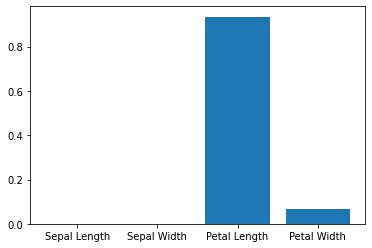

In [19]:
plt.bar(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], importance)

### Visualizing Decision Tree

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


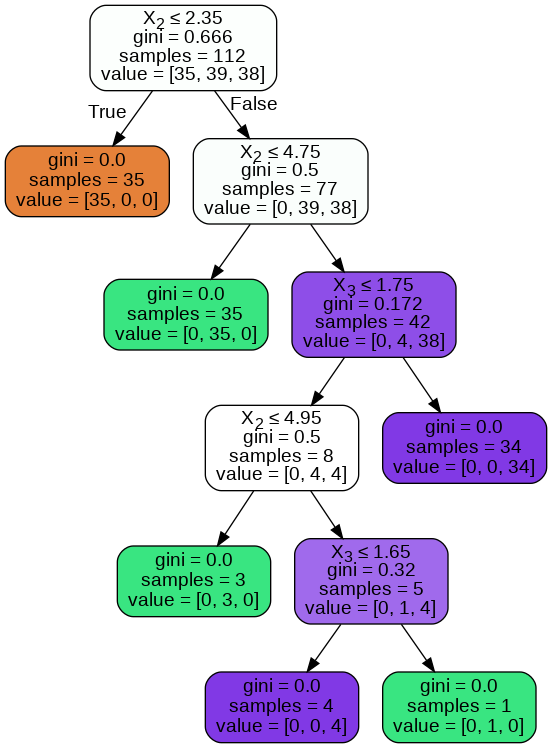

In [20]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### What's Happening with Decision Tree

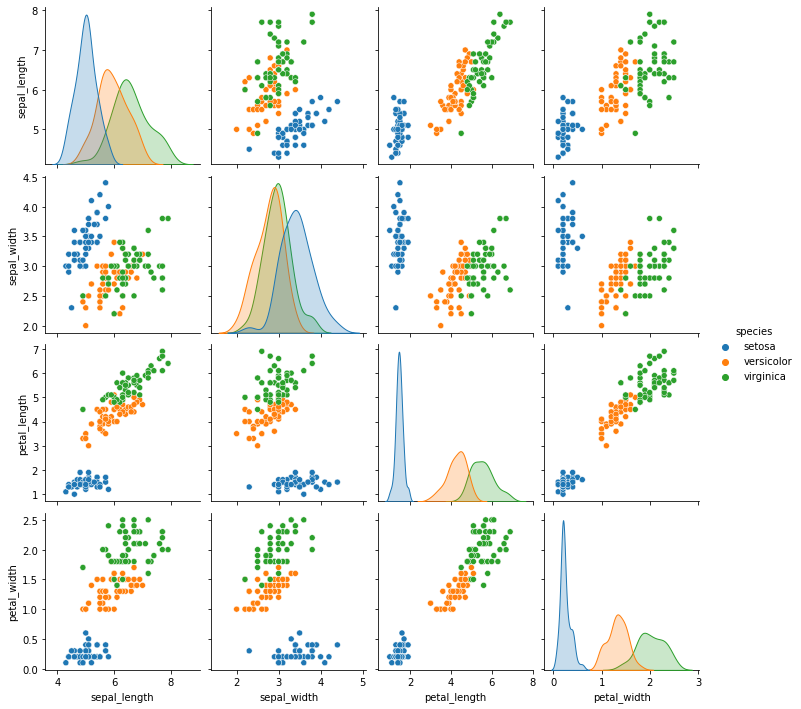

In [21]:
import seaborn as sns
iris = sns.load_dataset('iris')
sns.pairplot(data = iris, hue = 'species');

### Pre-pruning: Avoiding Over-fitting

- `max_depth`: limits depth of tree

- `max_leaf_nodes`: limits how many leafs

- `min_samples_leaf`: limits splits to happen when only certain number of samples exist

In [22]:
classifier = DecisionTreeClassifier(max_depth = 1).fit(X_train, y_train)

In [23]:
classifier.score(X_train, y_train)

0.6607142857142857

In [ ]:
classifier.score(X_test, y_test)

0.631578947368421

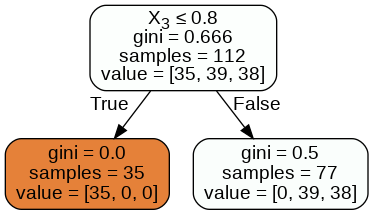

In [24]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [25]:
classifier = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

In [26]:
classifier.score(X_train, y_train)

0.9642857142857143

In [27]:
classifier.score(X_test, y_test)

0.9210526315789473

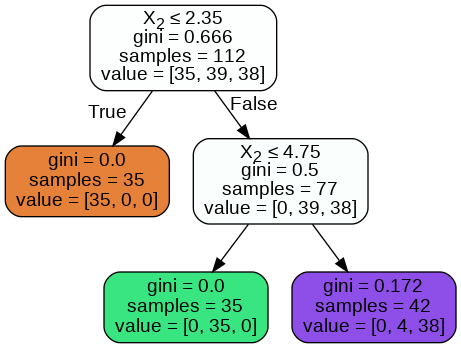

In [28]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [35]:
classifier = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
classifier.score(X_train, y_train)

0.9642857142857143

In [36]:
classifier.score(X_test, y_test)

0.9473684210526315

### Confusion Matrix

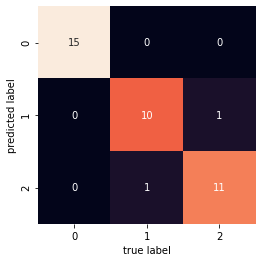

In [37]:
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.metrics import confusion_matrix

classifier=classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)

mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [38]:
sklearn.metrics.confusion_matrix(y_test, predictions)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 11]])

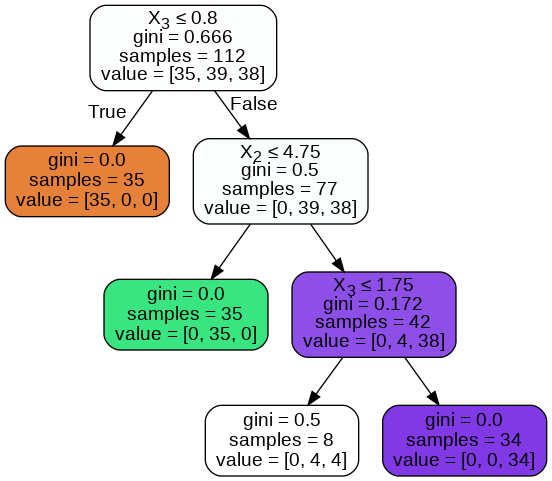

In [39]:
dot_data2 = StringIO()
export_graphviz(classifier, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())

In [40]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.9473684210526315